# Scene Classification

## 5. Predict

Reference:
- https://challenger.ai/competitions
- https://github.com/jupyter/notebook/issues/2287

**Tensorboard**
1. Input at command:  **tensorboard --logdir=./log**
2. Input at browser:  **http://127.0.0.1:6006**

### Import pkg

In [1]:
import numpy as np
import pandas as pd
# import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, TensorBoard

Using TensorFlow backend.


In [3]:
# import zipfile
import os
import zipfile
import math
import time
from IPython.display import display
import pdb
import json
from PIL import Image
import glob
import pickle

### Load sample data, only first 1000 objects

In [4]:
input_path = './input'
datasetName = 'train'
date = '20170904'

zip_path = input_path + '/ai_challenger_scene_{0}_{1}.zip'.format(datasetName, date)
extract_path = input_path + '/ai_challenger_scene_{0}_{1}'.format(datasetName, date)
image_path = extract_path + '/scene_{0}_images_{1}'.format(datasetName, date)
scene_classes_path = extract_path + '/scene_classes.csv'
scene_annotations_path = extract_path + '/scene_{0}_annotations_{1}.json'.format(datasetName, date)

print(input_path)
print(zip_path)
print(extract_path)
print(image_path)
print(scene_classes_path)
print(scene_annotations_path)

./input
./input/ai_challenger_scene_train_20170904.zip
./input/ai_challenger_scene_train_20170904
./input/ai_challenger_scene_train_20170904/scene_train_images_20170904
./input/ai_challenger_scene_train_20170904/scene_classes.csv
./input/ai_challenger_scene_train_20170904/scene_train_annotations_20170904.json


In [5]:
scene_classes = pd.read_csv(scene_classes_path, header=None)
display(scene_classes.head())

,0,1,2
0,0,航站楼,airport_terminal
1,1,停机坪,landing_field
2,2,机舱,airplane_cabin
3,3,游乐场,amusement_park
4,4,冰场,skating_rink


In [6]:
def get_scene_name(lable_number, scene_classes_path):
    scene_classes = pd.read_csv(scene_classes_path, header=None)
    return scene_classes.loc[lable_number, 2]
print(get_scene_name(0, scene_classes_path))

airport_terminal


In [7]:
pickleFolderV = 'pickle_{0}'.format('validation')
pickle_pathV = input_path + '/' + pickleFolderV

x_val_path = pickle_pathV + '/x_data0.p'
y_val_path = pickle_pathV + '/y_data0.p'
x_val0 = pickle.load(open(x_val_path, mode='rb'))
y_val0 = pickle.load(open(y_val_path, mode='rb'))
# x_val = x_val0[0:400]
# y_val = y_val0[0:400]
x_val = x_val0
y_val = y_val0
print(x_val.shape)
print(y_val.shape)

# x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1)
# y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
# print(y_train.shape)
print(y_val.shape)

(1024, 200, 200, 3)
(1024,)
(1024, 80)


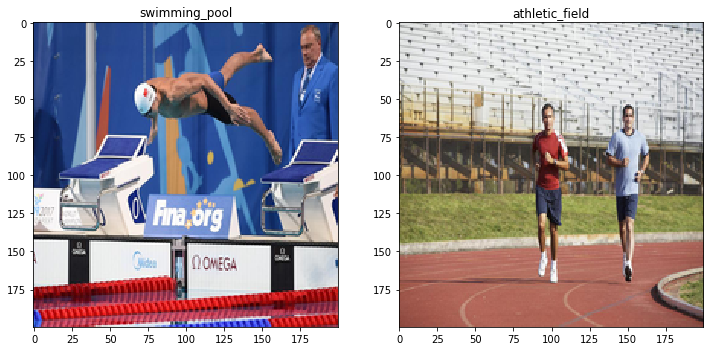

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(x_val[0])
ax[0].set_title(get_scene_name(y_val0[0], scene_classes_path))
ax[1].imshow(x_val[1])
ax[1].set_title(get_scene_name(y_val0[1], scene_classes_path))

In [9]:
pickleFolder = 'pickle_{0}'.format(datasetName)
pickle_path = input_path + '/' + pickleFolder

x_data_path = pickle_path + '/x_data0.p'
y_data_path = pickle_path + '/y_data0.p'
x_data = pickle.load(open(x_data_path, mode='rb'))
y_data = pickle.load(open(y_data_path, mode='rb'))
print(x_data.shape)
print(y_data.shape)

(4096, 200, 200, 3)
(4096,)


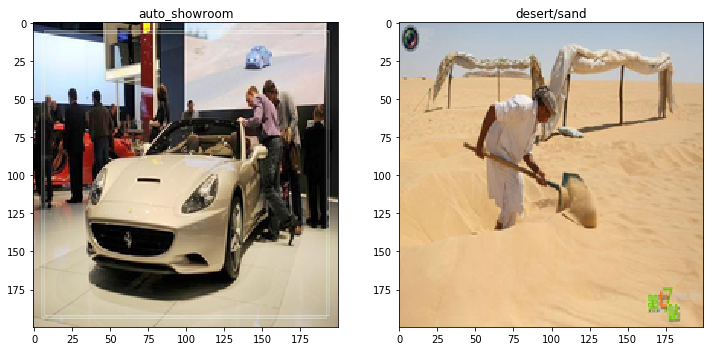

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(x_data[0])
ax[0].set_title(get_scene_name(y_data[0], scene_classes_path))
ax[1].imshow(x_data[1])
ax[1].set_title(get_scene_name(y_data[1], scene_classes_path))

### Load model

In [11]:
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
# from keras.applications.resnet50 import ResNet50
# from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.applications.inception_v3 import InceptionV3

model = load_model('./model/TrainImageFolder2017-10-02_20-21-33/TrainImageFolder2017-10-02_20-21-33.h5')

In [12]:
%%time
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 1.1670, final accuracy: 0.6836
Wall time: 47.1 s


In [13]:
%%time
y_data_cat = to_categorical(y_data)
final_loss, final_acc = model.evaluate(x_data, y_data_cat, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.6738, final accuracy: 0.7993
Wall time: 2min 45s


In [14]:
print('Done!')

Done!
